In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('house_prices-1.csv')
data.dtypes

ID              int64
Size(sqft)    float64
Bedrooms      float64
Badhrooms     float64
Location       object
House_Type     object
Year_Built    float64
Date_Sold      object
Price         float64
dtype: object

## Project 1: Data Cleaning and Preprocessing

#### 1.) Identify and Remove Duplicates

In [30]:
for col in data.columns:
    print("==========================")
    print(f'Duplicated {col}')
    print("==========================")
    for idx, case in enumerate(data.duplicated(f'{col}', keep=False)):
        # prints the indexes that are duplicated.
        if case==True:
            print("index: ", idx)
            
data_no_dup = data.drop_duplicates(keep='first')
# This dropped the dups
data_no_dup.reset_index(drop=True)

Duplicated ID
Duplicated Size(sqft)
index:  9
index:  12
index:  16
index:  26
index:  34
index:  36
index:  46
index:  50
index:  56
index:  57
index:  58
index:  64
index:  65
index:  66
index:  68
index:  69
index:  70
index:  79
index:  83
index:  92
index:  100
index:  101
index:  102
index:  103
index:  104
index:  105
index:  106
index:  107
index:  108
index:  109
Duplicated Bedrooms
index:  0
index:  1
index:  2
index:  3
index:  4
index:  5
index:  6
index:  8
index:  9
index:  10
index:  11
index:  12
index:  13
index:  14
index:  15
index:  16
index:  17
index:  18
index:  20
index:  21
index:  22
index:  23
index:  24
index:  26
index:  27
index:  28
index:  29
index:  30
index:  31
index:  32
index:  33
index:  34
index:  35
index:  36
index:  37
index:  38
index:  39
index:  40
index:  41
index:  42
index:  43
index:  44
index:  45
index:  46
index:  47
index:  48
index:  49
index:  50
index:  51
index:  52
index:  53
index:  54
index:  55
index:  56
index:  57
index:  5

,ID,Size(sqft),Bedrooms,Badhrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,1,837.0,1.0,NaN,Rural,NaN,1938.0,7/21/20 00:00,221958.0
1,2,1378.0,1.0,1.0,NaN,Townhouse,200800.0,2/2/22 00:00,771155.0
2,3,157600.0,4.0,1.0,Rural,Semi-Detached,1952.0,6/6/23 00:00,231932.0
3,4,-4493.0,NaN,1.0,Urban,Townhouse,1941.0,6/4/23 00:00,465838.0
4,5,879.0,6.0,3.0,Suburban,Townhouse,NaN,NaN,359178.0
...,...,...,...,...,...,...,...,...,...
105,106,1984.0,1.0,2.0,Urban,Apartment,1904.0,1/1/22 00:00,600186.0
106,107,NaN,1.0,2.0,Rural,Townhouse,NaN,2/10/20 00:00,970910.0
107,108,3945.0,3.0,NaN,Urban,Townhouse,195700.0,6/25/20 00:00,748531.0
108,109,3068.0,3.0,NaN,Rural,NaN,1904.0,12/9/23 00:00,237337.0


#### 2.) Handling Missing Values

In [31]:
data_filled_na = data_no_dup.copy()
not_numerical = ['Location', 'House_Type', 'Date_Sold']
numerical = ['Size(sqft)', 'Bedrooms', 'Badhrooms', 'Year_Built', 'Price']

def missing_data(data):
    for idx, col in enumerate(data.columns):
        n = data[col].isnull().sum()
        if col=='ID':
            print("============")
            print("Skipped: ", col)
        else:
            print("============")
            print(col, "count of na: ", n )
            mean = (n/91)
            print("Mean: ", mean)
    return data            
def fill_numerical(data, num_list):
    for col in data.columns:
        n = data[col].isnull().sum()
        if col in num_list:
            mean = (n/91)
            print(f"Count of NaN in {col}: ", n)
            print("Mean: ", mean)
            data[col] = data[col].fillna(mean).reset_index(drop=True)
            print("Filled missing values with means.")
    return data

def fill_categorical(data, not_num_list):
    for col in data.columns:
        n = data[col].isnull().sum()
        if col in not_num_list:
            mode = data[col].mode(dropna=True)
            if not mode.empty:
                data[col] = data[col].fillna(mode[0]).reset_index(drop=True)
    return data
missing_data(data_filled_na)

Skipped:  ID
Size(sqft) count of na:  12
Mean:  0.13186813186813187
Bedrooms count of na:  8
Mean:  0.08791208791208792
Badhrooms count of na:  20
Mean:  0.21978021978021978
Location count of na:  10
Mean:  0.10989010989010989
House_Type count of na:  15
Mean:  0.16483516483516483
Year_Built count of na:  11
Mean:  0.12087912087912088
Date_Sold count of na:  10
Mean:  0.10989010989010989
Price count of na:  5
Mean:  0.054945054945054944


,ID,Size(sqft),Bedrooms,Badhrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,1,837.0,1.0,NaN,Rural,NaN,1938.0,7/21/20 00:00,221958.0
1,2,1378.0,1.0,1.0,NaN,Townhouse,200800.0,2/2/22 00:00,771155.0
2,3,157600.0,4.0,1.0,Rural,Semi-Detached,1952.0,6/6/23 00:00,231932.0
3,4,-4493.0,NaN,1.0,Urban,Townhouse,1941.0,6/4/23 00:00,465838.0
4,5,879.0,6.0,3.0,Suburban,Townhouse,NaN,NaN,359178.0
...,...,...,...,...,...,...,...,...,...
105,106,1984.0,1.0,2.0,Urban,Apartment,1904.0,1/1/22 00:00,600186.0
106,107,NaN,1.0,2.0,Rural,Townhouse,NaN,2/10/20 00:00,970910.0
107,108,3945.0,3.0,NaN,Urban,Townhouse,195700.0,6/25/20 00:00,748531.0
108,109,3068.0,3.0,NaN,Rural,NaN,1904.0,12/9/23 00:00,237337.0


#### Numerical Values

In [32]:
fill_numerical(data_filled_na, numerical)

Count of NaN in Size(sqft):  12
Mean:  0.13186813186813187
Filled missing values with means.
Count of NaN in Bedrooms:  8
Mean:  0.08791208791208792
Filled missing values with means.
Count of NaN in Badhrooms:  20
Mean:  0.21978021978021978
Filled missing values with means.
Count of NaN in Year_Built:  11
Mean:  0.12087912087912088
Filled missing values with means.
Count of NaN in Price:  5
Mean:  0.054945054945054944
Filled missing values with means.


,ID,Size(sqft),Bedrooms,Badhrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,1,837.000000,1.000000,0.21978,Rural,NaN,1938.000000,7/21/20 00:00,221958.0
1,2,1378.000000,1.000000,1.00000,NaN,Townhouse,200800.000000,2/2/22 00:00,771155.0
2,3,157600.000000,4.000000,1.00000,Rural,Semi-Detached,1952.000000,6/6/23 00:00,231932.0
3,4,-4493.000000,0.087912,1.00000,Urban,Townhouse,1941.000000,6/4/23 00:00,465838.0
4,5,879.000000,6.000000,3.00000,Suburban,Townhouse,0.120879,NaN,359178.0
...,...,...,...,...,...,...,...,...,...
105,106,1984.000000,1.000000,2.00000,Urban,Apartment,1904.000000,1/1/22 00:00,600186.0
106,107,0.131868,1.000000,2.00000,Rural,Townhouse,0.120879,2/10/20 00:00,970910.0
107,108,3945.000000,3.000000,0.21978,Urban,Townhouse,195700.000000,6/25/20 00:00,748531.0
108,109,3068.000000,3.000000,0.21978,Rural,NaN,1904.000000,12/9/23 00:00,237337.0


#### Categorical Values

In [33]:
fill_categorical(data_filled_na, not_numerical)

,ID,Size(sqft),Bedrooms,Badhrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,1,837.000000,1.000000,0.21978,Rural,Apartment,1938.000000,7/21/20 00:00,221958.0
1,2,1378.000000,1.000000,1.00000,Urban,Townhouse,200800.000000,2/2/22 00:00,771155.0
2,3,157600.000000,4.000000,1.00000,Rural,Semi-Detached,1952.000000,6/6/23 00:00,231932.0
3,4,-4493.000000,0.087912,1.00000,Urban,Townhouse,1941.000000,6/4/23 00:00,465838.0
4,5,879.000000,6.000000,3.00000,Suburban,Townhouse,0.120879,1/1/22 00:00,359178.0
...,...,...,...,...,...,...,...,...,...
105,106,1984.000000,1.000000,2.00000,Urban,Apartment,1904.000000,1/1/22 00:00,600186.0
106,107,0.131868,1.000000,2.00000,Rural,Townhouse,0.120879,2/10/20 00:00,970910.0
107,108,3945.000000,3.000000,0.21978,Urban,Townhouse,195700.000000,6/25/20 00:00,748531.0
108,109,3068.000000,3.000000,0.21978,Rural,Apartment,1904.000000,12/9/23 00:00,237337.0


#### 3.) Outlier Detection and Handling

#### Z-scores

In [34]:
def numerical_zscore(data, num_list):
    return {col: (data[col] - data[col].mean()) / data[col].std(ddof=0) for col in num_list}

def id_outlier(data, num_list):
    z_scores = numerical_zscore(data, num_list)
    for col, scores in z_scores.items():
        above_Q3 = scores[scores > 3]
        below_Q1 = scores[scores < -3]
        print(f"Upper Outlier for {col}:\n{above_Q3}")
        print(f"Lower Outlier for {col}:\n{below_Q1}")
        print()
        print("======================")
    print("=================================================")
    for col, scores in z_scores.items():
        Q3 = scores[(scores >= 2) & (scores <= 3)]
        Q1 = scores[(scores <= -2) & (scores >= -3)]
        print(f"95% for {col}:\n {Q3}")
        print(f"5% for {col}:\n {Q1}")
        print()
        print("======================")
    return data

In [35]:
not_numerical = ['Location', 'House_Type', 'Date_Sold']
numerical = ['Size(sqft)', 'Bedrooms', 'Badhrooms', 'Year_Built', 'Price']
id_outlier(data_filled_na, numerical)

Upper Outlier for Size(sqft):
14    7.051385
17    5.037505
20    4.092812
39    3.071958
Name: Size(sqft), dtype: float64
Lower Outlier for Size(sqft):
Series([], Name: Size(sqft), dtype: float64)

Upper Outlier for Bedrooms:
7     6.102964
96    7.682990
Name: Bedrooms, dtype: float64
Lower Outlier for Bedrooms:
Series([], Name: Bedrooms, dtype: float64)

Upper Outlier for Badhrooms:
13    6.354466
41    4.160148
43    6.354466
Name: Badhrooms, dtype: float64
Lower Outlier for Badhrooms:
Series([], Name: Badhrooms, dtype: float64)

Upper Outlier for Year_Built:
1      4.681585
37     4.507010
68     4.556186
77     4.602903
107    4.556186
Name: Year_Built, dtype: float64
Lower Outlier for Year_Built:
Series([], Name: Year_Built, dtype: float64)

Upper Outlier for Price:
5     6.061815
41    6.094806
Name: Price, dtype: float64
Lower Outlier for Price:
57    -3.84211
100   -3.84211
Name: Price, dtype: float64

95% for Size(sqft):
 2    2.074538
Name: Size(sqft), dtype: float64
5% for

,ID,Size(sqft),Bedrooms,Badhrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,1,837.000000,1.000000,0.21978,Rural,Apartment,1938.000000,7/21/20 00:00,221958.0
1,2,1378.000000,1.000000,1.00000,Urban,Townhouse,200800.000000,2/2/22 00:00,771155.0
2,3,157600.000000,4.000000,1.00000,Rural,Semi-Detached,1952.000000,6/6/23 00:00,231932.0
3,4,-4493.000000,0.087912,1.00000,Urban,Townhouse,1941.000000,6/4/23 00:00,465838.0
4,5,879.000000,6.000000,3.00000,Suburban,Townhouse,0.120879,1/1/22 00:00,359178.0
...,...,...,...,...,...,...,...,...,...
105,106,1984.000000,1.000000,2.00000,Urban,Apartment,1904.000000,1/1/22 00:00,600186.0
106,107,0.131868,1.000000,2.00000,Rural,Townhouse,0.120879,2/10/20 00:00,970910.0
107,108,3945.000000,3.000000,0.21978,Urban,Townhouse,195700.000000,6/25/20 00:00,748531.0
108,109,3068.000000,3.000000,0.21978,Rural,Apartment,1904.000000,12/9/23 00:00,237337.0


#### Windsorization

In [36]:
def winsorization(data, lower=0.05, upper=0.95):
    winsorized = {}
    for col in data.select_dtypes(include='number').columns:
        s = data[col]
        low = s.quantile(lower)
        high = s.quantile(upper)
        data[col] = s.clip(lower=low, upper=high)
    return data


In [37]:
windsorized_data = winsorization(data_filled_na)
windsorized_data

,ID,Size(sqft),Bedrooms,Badhrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,6.45,837.000000,1.000000,0.21978,Rural,Apartment,1938.000000,7/21/20 00:00,221958.0
1,6.45,1378.000000,1.000000,1.00000,Urban,Townhouse,2020.550000,2/2/22 00:00,771155.0
2,6.45,4994.650000,4.000000,1.00000,Rural,Semi-Detached,1952.000000,6/6/23 00:00,231932.0
3,6.45,0.131868,0.087912,1.00000,Urban,Townhouse,1941.000000,6/4/23 00:00,465838.0
4,6.45,879.000000,6.000000,3.00000,Suburban,Townhouse,0.120879,1/1/22 00:00,359178.0
...,...,...,...,...,...,...,...,...,...
105,104.55,1984.000000,1.000000,2.00000,Urban,Apartment,1904.000000,1/1/22 00:00,600186.0
106,104.55,0.131868,1.000000,2.00000,Rural,Townhouse,0.120879,2/10/20 00:00,970910.0
107,104.55,3945.000000,3.000000,0.21978,Urban,Townhouse,2020.550000,6/25/20 00:00,748531.0
108,104.55,3068.000000,3.000000,0.21978,Rural,Apartment,1904.000000,12/9/23 00:00,237337.0


### Project 2: Data Normalization and Standardization

In [38]:
#### 1.) Standardize

In [39]:
two_cols = ['Size(sqft)', 'Price']
def standardize(data, columns):
    for col in data[columns]:
        z_score = (data[col] - data[col].mean()) / data[col].std(ddof=0)
        data[col] = z_score
    return data

In [40]:
standardized = standardize(windsorized_data, two_cols)

In [41]:
#### 2.) Normalize

In [42]:
two_cols = ['Bedrooms', 'Badhrooms']
def normalize(data, columns):
    for col in data[columns]:
        data_mean = np.mean(data[col])
        MAX = np.max(data[col])
        MIN = np.min(data[col])
        mean_norm = ( (data[col] - data_mean) / (MAX-MIN) )
        data[col] = mean_norm
    return data    

In [43]:
normalized = normalize(standardized, two_cols)

In [44]:
#### 3.) Min-Max Scaling

In [45]:
single_col = ['Year_Built']
def min_max_scale(data, target_col):
    data_mean = np.mean(data[target_col])
    MAX = np.max(data[target_col])
    MIN = np.min(data[target_col])
    mean_norm = ( (data[target_col] - MIN) / (MAX-MIN) )
    data[target_col] = mean_norm
    return data  

In [46]:
min_max_scaled = min_max_scale(normalized, single_col)

### Project 3: Encoding Categorical Variables

#### 1.) Label Encoding

In [47]:
def label_encoding(data):
    # We create a map to hold the idx, and unique case values.
    loc_map = {} 
    for idx, case in enumerate(data['Location'].unique()):
        loc_map[case] = idx
    data['Location'] = data['Location'].map(loc_map)
    return data

In [48]:
label_encoded = label_encoding(min_max_scaled)

In [49]:
label_encoded

,ID,Size(sqft),Bedrooms,Badhrooms,Location,House_Type,Year_Built,Date_Sold,Price
0,6.45,-0.985972,-0.360037,-0.385946,0,Apartment,0.973129,7/21/20 00:00,-0.765222
1,6.45,-0.637118,-0.360037,-0.159867,1,Townhouse,1.000000,2/2/22 00:00,0.970514
2,6.45,1.695015,0.147398,-0.159867,0,Semi-Detached,0.977686,6/6/23 00:00,-0.733699
3,6.45,-1.525612,-0.514312,-0.159867,1,Townhouse,0.974106,6/4/23 00:00,0.005560
4,6.45,-0.958889,0.485688,0.419658,2,Townhouse,0.342329,1/1/22 00:00,-0.331539
...,...,...,...,...,...,...,...,...,...
105,104.55,-0.246350,-0.360037,0.129895,1,Apartment,0.962062,1/1/22 00:00,0.430167
106,104.55,-1.525612,-0.360037,0.129895,0,Townhouse,0.342329,2/10/20 00:00,1.601840
107,104.55,1.018167,-0.021747,-0.385946,1,Townhouse,1.000000,6/25/20 00:00,0.899011
108,104.55,0.452649,-0.021747,-0.385946,0,Apartment,0.962062,12/9/23 00:00,-0.716617


In [50]:
def one_hot_encoding(data, column_name, column_values):
    # Create binary columns only for string-type categories
    for dwelling in column_values:
        data[f"{dwelling}"] = (data[column_name] == dwelling).astype(int)
    return data

In [51]:
unique = ['Townhouse', 'Semi-Detached','Detached', 'Apartment']
one_hot = one_hot_encoding(label_encoded, 'House_Type', unique)

In [52]:
one_hot

,ID,Size(sqft),Bedrooms,Badhrooms,Location,House_Type,Year_Built,Date_Sold,Price,Townhouse,Semi-Detached,Detached,Apartment
0,6.45,-0.985972,-0.360037,-0.385946,0,Apartment,0.973129,7/21/20 00:00,-0.765222,0,0,0,1
1,6.45,-0.637118,-0.360037,-0.159867,1,Townhouse,1.000000,2/2/22 00:00,0.970514,1,0,0,0
2,6.45,1.695015,0.147398,-0.159867,0,Semi-Detached,0.977686,6/6/23 00:00,-0.733699,0,1,0,0
3,6.45,-1.525612,-0.514312,-0.159867,1,Townhouse,0.974106,6/4/23 00:00,0.005560,1,0,0,0
4,6.45,-0.958889,0.485688,0.419658,2,Townhouse,0.342329,1/1/22 00:00,-0.331539,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,104.55,-0.246350,-0.360037,0.129895,1,Apartment,0.962062,1/1/22 00:00,0.430167,0,0,0,1
106,104.55,-1.525612,-0.360037,0.129895,0,Townhouse,0.342329,2/10/20 00:00,1.601840,1,0,0,0
107,104.55,1.018167,-0.021747,-0.385946,1,Townhouse,1.000000,6/25/20 00:00,0.899011,1,0,0,0
108,104.55,0.452649,-0.021747,-0.385946,0,Apartment,0.962062,12/9/23 00:00,-0.716617,0,0,0,1


### Project 4: Multivariate Analysis

#### 1.) Correlation Analysis

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

def seaborn_heatmap(data, numerical_vars, cmap="coolwarm", fmt=".2f"):
    """
    Plot a correlation heatmap for the given numeric vars in `data`.
    """
    # 1. compute the correlation matrix
    corr = data[numerical_vars].corr()
    
    # 2. draw the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr,
        annot=True,        # show numbers in each cell
        fmt=fmt,           # formatting for the annotations
        cmap=cmap,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.8}
    )
    
    # 3. tidy up the axes
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.title("Correlation Heatmap")
    plt.tight_layout()
    plt.show()

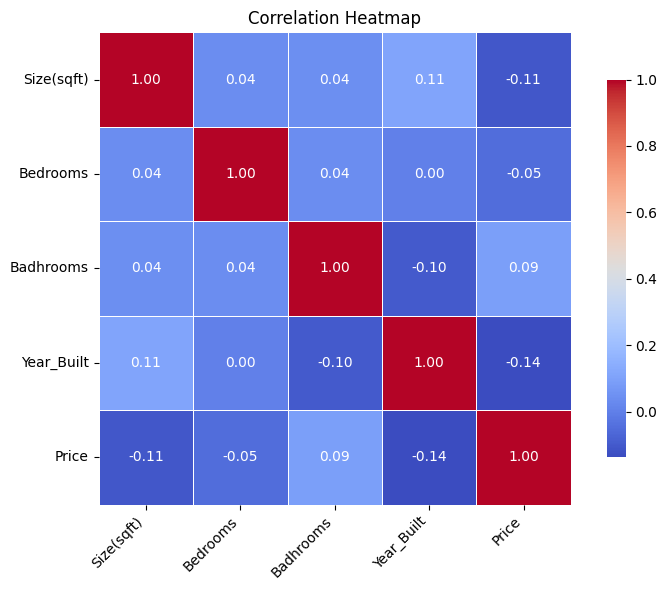

In [54]:
numerical = ['Size(sqft)', 'Bedrooms', 'Badhrooms', 'Year_Built', 'Price']
seaborn_heatmap(one_hot, numerical)

In [ ]:
#### Pairplots

In [59]:
def pairplot_numerical(data):
    # TYPOS
    data = data.rename(columns={'Badhrooms': 'Bathrooms'})
    cols = ['Size(sqft)', 'Bedrooms', 'Bathrooms', 'Price']

    # Pairplot
    sns.pairplot(data[cols], diag_kind='auto', corner=True)
    plt.suptitle("Pairwise Relationships Between Numerical Variables", y=1.02)
    plt.tight_layout()
    plt.show()

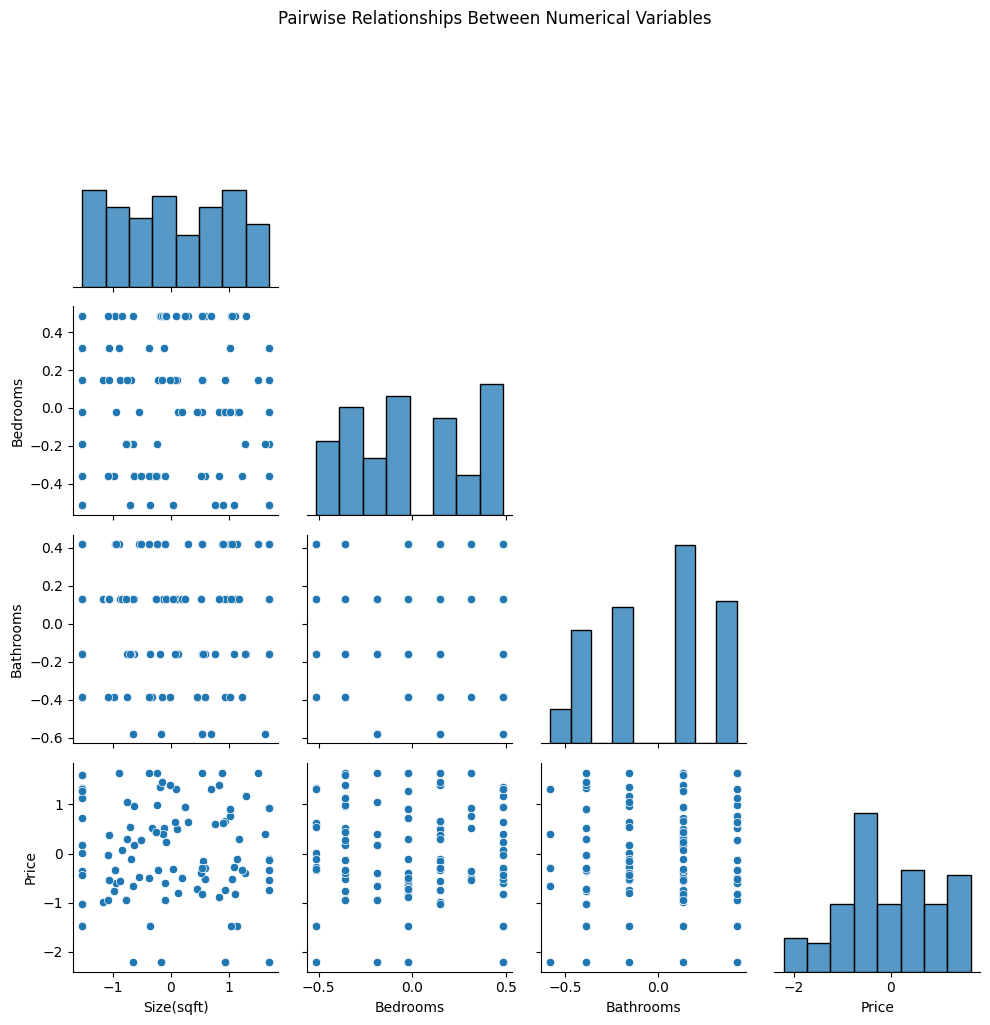

In [60]:
pairplot_numerical(one_hot)

### 2.) Feature Engineering

In [55]:
def feature_eng(data, col='Date_Sold', new_col='Date_Sold_byYear'):
    data = data.copy()

    data[col] = pd.to_datetime(data[col], errors="coerce")

    years = data[col].dt.year

    unique_years = sorted(years.dropna().unique())
    year_map = {year: idx for idx, year in enumerate(unique_years)}

    data[new_col] = years.map(year_map)

    return data


In [56]:
feature_eng(one_hot)

/tmp/ipykernel_952639/2980348206.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col], errors="coerce")


,ID,Size(sqft),Bedrooms,Badhrooms,Location,House_Type,Year_Built,Date_Sold,Price,Townhouse,Semi-Detached,Detached,Apartment,Date_Sold_byYear
0,6.45,-0.985972,-0.360037,-0.385946,0,Apartment,0.973129,2020-07-21,-0.765222,0,0,0,1,0
1,6.45,-0.637118,-0.360037,-0.159867,1,Townhouse,1.000000,2022-02-02,0.970514,1,0,0,0,2
2,6.45,1.695015,0.147398,-0.159867,0,Semi-Detached,0.977686,2023-06-06,-0.733699,0,1,0,0,3
3,6.45,-1.525612,-0.514312,-0.159867,1,Townhouse,0.974106,2023-06-04,0.005560,1,0,0,0,3
4,6.45,-0.958889,0.485688,0.419658,2,Townhouse,0.342329,2022-01-01,-0.331539,1,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,104.55,-0.246350,-0.360037,0.129895,1,Apartment,0.962062,2022-01-01,0.430167,0,0,0,1,2
106,104.55,-1.525612,-0.360037,0.129895,0,Townhouse,0.342329,2020-02-10,1.601840,1,0,0,0,0
107,104.55,1.018167,-0.021747,-0.385946,1,Townhouse,1.000000,2020-06-25,0.899011,1,0,0,0,0
108,104.55,0.452649,-0.021747,-0.385946,0,Apartment,0.962062,2023-12-09,-0.716617,0,0,0,1,3
